In [2]:
from ngs_analysis import app
from ngs_analysis.interactive import *
from ngs_analysis.sequence import read_fastq, write_fake_fastq

In [12]:
example_directory = os.path.dirname(app.__file__) + '/../../examples/paired_reads'
os.chdir(example_directory)

### setup

In [158]:
!cat config.yaml

# 1. match the insert DNA
left_adapter:  GATATACC # before MGS
right_adapter: CTCGAGCA # after barcode

# 2. use regular expression to capture a part from the 
#    insert DNA (adapters are removed)
dna_parts:
 barcode: GTTACCGGTATCTCGCTTGC(.*)$ # between spacer and right adapter
    
# 3. translate protein from the insert DNA, beginning where the
#    "start_at" regular expression matches
# 4. capture protein parts that adhere to one of the listed patterns, 
#    as defined by the "capture" regular expressions
protein:
  start_at: ^ATG # translation start
  patterns: 
    - 'MGSS{Hisx6}{GS_linker}{minibinder}' # N term tag
    - 'MGS{minibinder}{GS_linker}{Hisx6}' # C term tag
  capture:
    Hisx6: 'HHHHHH' # greedy capture
    GS_linker: '[GS]{3,}' # 3 or more G or S
    minibinder: '.*' # any amino acid sequence

# list part names to compare to reference
# use the "_aa" suffix to compare protein translations
# the format "barcode -> minibinder_aa" means first match by
# barcode, the

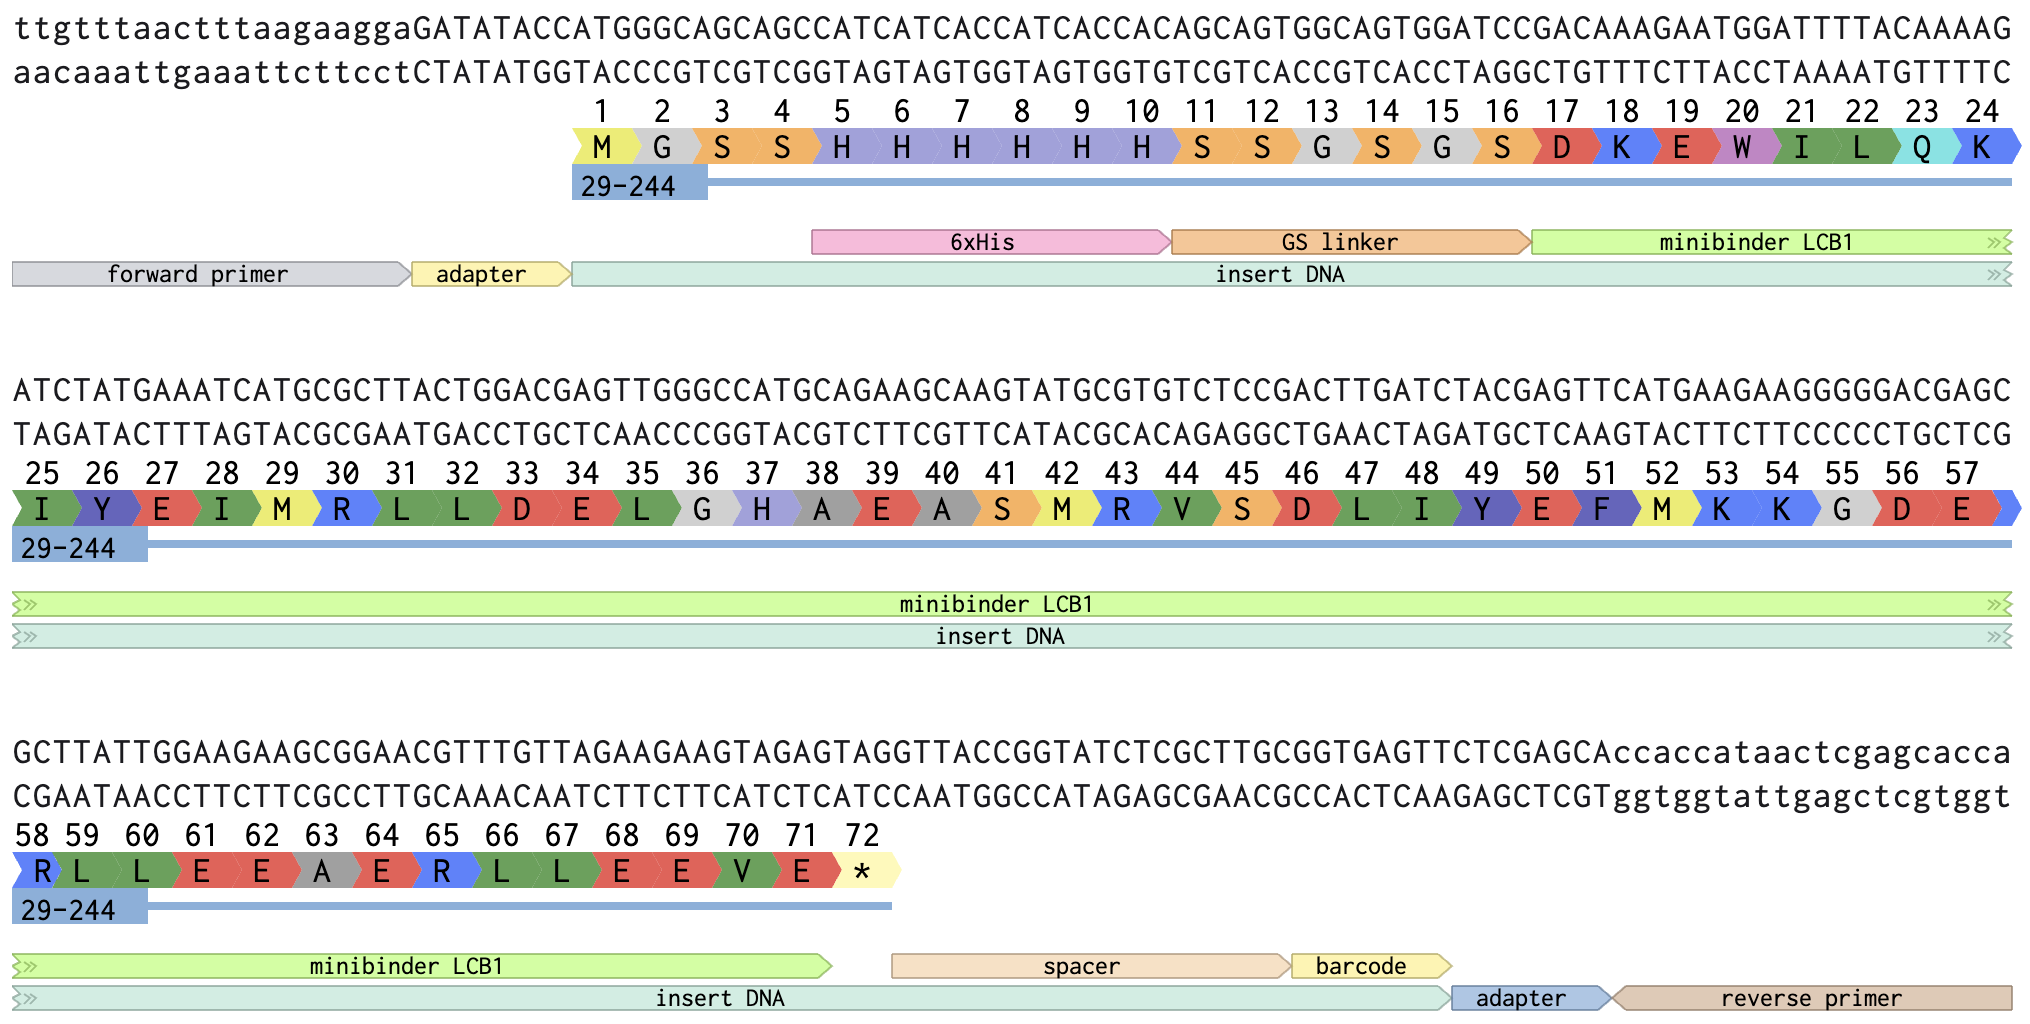

In [159]:
# first pattern, N-term tag
Image('pattern_1.png', width=800)

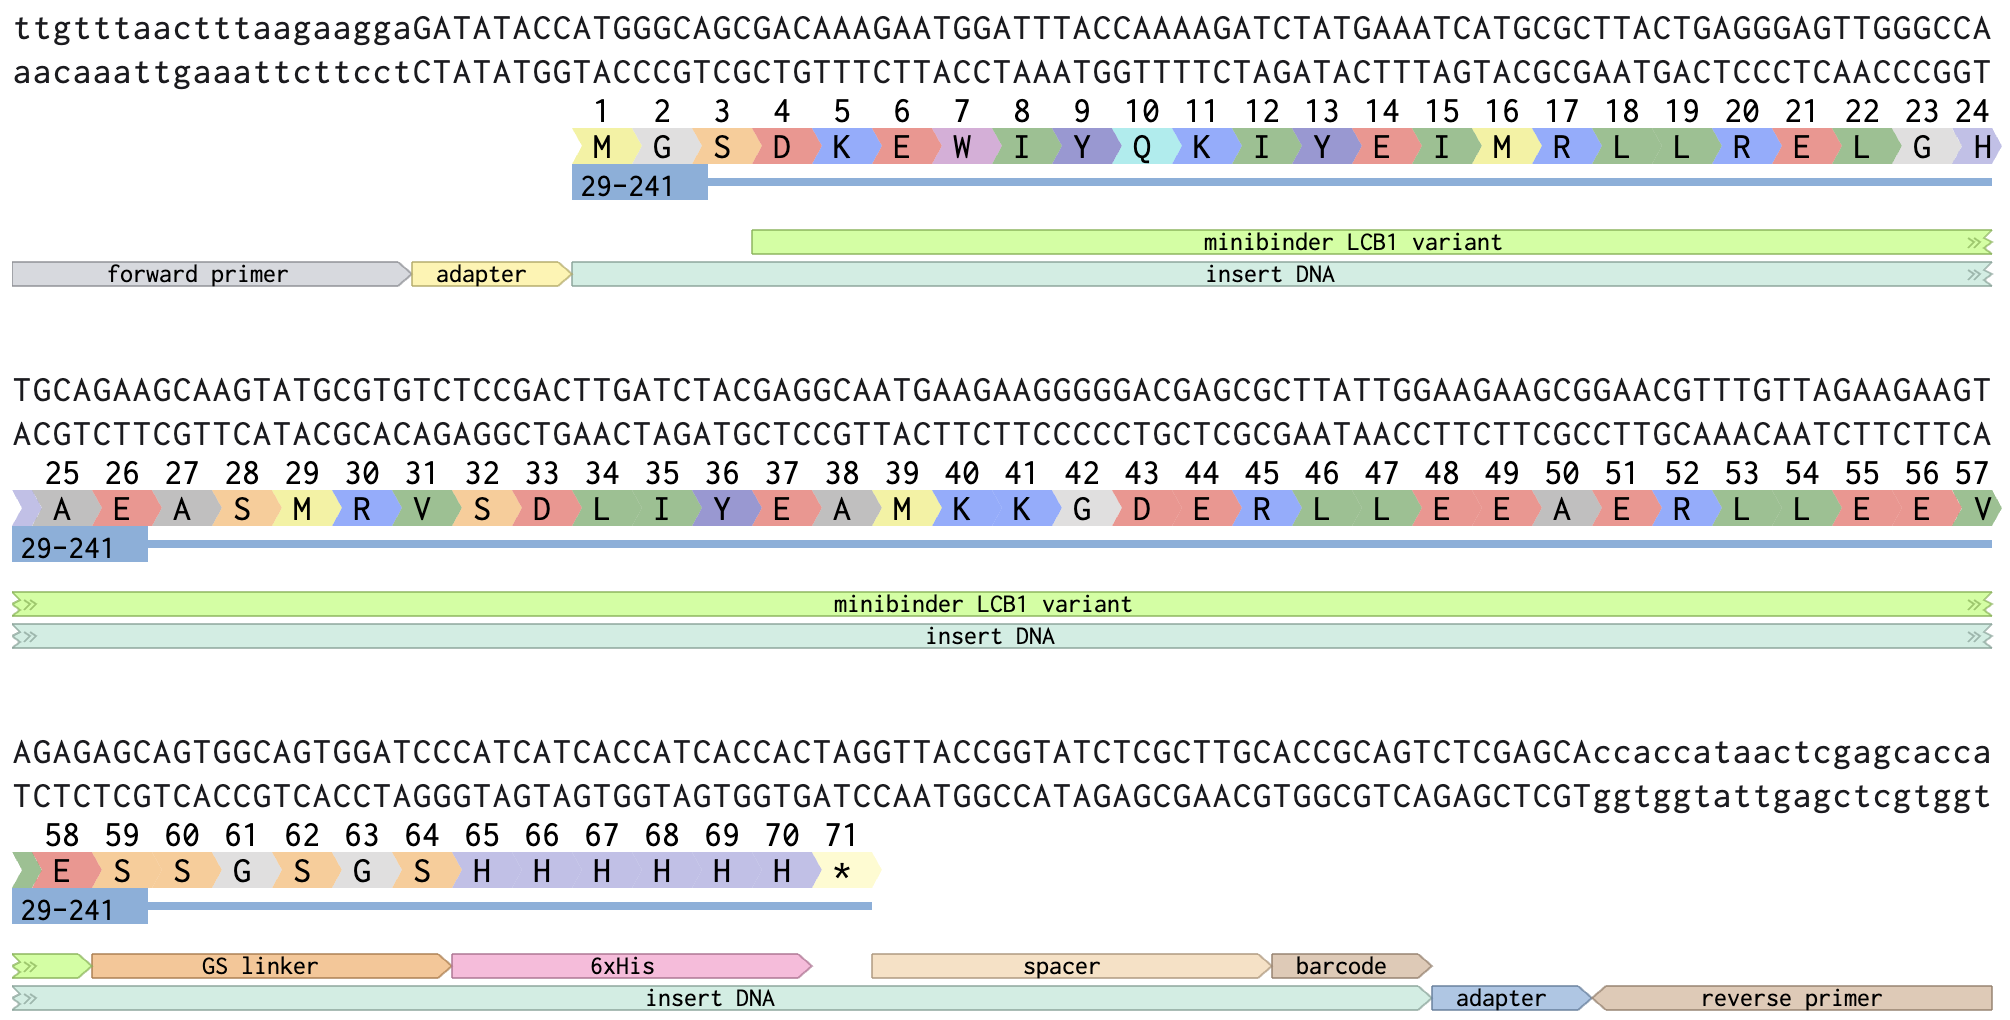

In [161]:
# second pattern, C-term tag
Image('pattern_2.png', width=800)

In [175]:
# the reference DNA table contains just these two sequences
for _, row in pd.read_csv('reference_dna.csv').iterrows():
    print(row.to_dict())

{'name': 'example_1', 'vector_dna': 'ttgtttaactttaagaaggaGATATACCATGGGCAGCAGCCATCATCACCATCACCACAGCAGTGGCAGTGGATCCGACAAAGAATGGATTTTACAAAAGATCTATGAAATCATGCGCTTACTGGACGAGTTGGGCCATGCAGAAGCAAGTATGCGTGTCTCCGACTTGATCTACGAGTTCATGAAGAAGGGGGACGAGCGCTTATTGGAAGAAGCGGAACGTTTGTTAGAAGAAGTAGAGTAGGTTACCGGTATCTCGCTTGCGGTGAGTTCTCGAGCAccaccataactcgagcacca'}
{'name': 'example_2', 'vector_dna': 'ttgtttaactttaagaaggaGATATACCATGGGCAGCGACAAAGAATGGATTTACCAAAAGATCTATGAAATCATGCGCTTACTGAGGGAGTTGGGCCATGCAGAAGCAAGTATGCGTGTCTCCGACTTGATCTACGAGGCAATGAAGAAGGGGGACGAGCGCTTATTGGAAGAAGCGGAACGTTTGTTAGAAGAAGTAGAGAGCAGTGGCAGTGGATCCCATCATCACCATCACCACTAGGTTACCGGTATCTCGCTTGCACCGCAGTCTCGAGCAccaccataactcgagcacca'}


### analyze reference DNA in simulation mode

In [20]:
pd.read_csv('reference_dna.csv')

,source,name,reference_dna
0,pool1,example_1,ttgtttaactttaagaaggaGATATACCATGGGCAGCAGCCATCAT...
1,pool2,example_2,ttgtttaactttaagaaggaGATATACCATGGGCAGCGACAAAGAA...
2,pool3,example_1,ttgtttaactttaagaaggaGATATACCATGGGCAGCAGCCATCAT...
3,pool3,example_3,ttgtttaactttaagaaggaGATATACCATGGGCAGCGACAAAGAA...


In [14]:
app.setup()

Creating working directories...
Checking config...
Found 4 reference sequences in reference_dna.csv
Converting reference sequences to design table...
Parsed 4 sequences from reference_dna.csv
Null entries:
                   null entries  null fraction
    read_length               0            0.0
    insert_length             0            0.0
    barcode                   0            0.0
    cds                       0            0.0
    Hisx6                     0            0.0
    GS_linker                 0            0.0
    minibinder                0            0.0
DNA length:
            barcode  cds  Hisx6  GS_linker  minibinder
    count         4    4      4          4           4
    min           8  210     18          9         165
    median        8  211     18         13         169
    max           8  213     18         18         174
Protein length:
            barcode  cds  Hisx6  GS_linker  minibinder
    count         4    4      4          4           4
    m

In [27]:
# simulate paired-end reads according to sample plan
display(pd.read_csv('sample_plan.csv'))
app.simulate_paired_reads()

,sample,source,coverage
0,sample_A,pool1,50
1,sample_B,pool2,50
2,sample_C,pool1,50
3,sample_C,pool2,20
4,sample_D,pool3,50


Wrote 50 paired reads to 0_paired_reads/simulate/sample_A_R[12].fastq
Wrote 50 paired reads to 0_paired_reads/simulate/sample_B_R[12].fastq
Wrote 50 paired reads to 0_paired_reads/simulate/sample_C_R[12].fastq
Wrote 20 paired reads to 0_paired_reads/simulate/sample_C_R[12].fastq
Wrote 100 paired reads to 0_paired_reads/simulate/sample_D_R[12].fastq


In [31]:
for sample in ('sample_A', 'sample_B', 'sample_C', 'sample_D'):
    app.merge_read_pairs(sample, simulate=True)
    app.parse_reads(sample, simulate=True)
    app.map_parsed_reads(sample, simulate=True)

Running ngmerge on sample sample_A... done in 0.00786 seconds
Wrote output to 1_reads/simulate/sample_A.fastq
Loading reads... done in 0.000716 seconds
Parsing 50 reads... done in 0.00359 seconds
Creating mmseqs index for fields: minibinder_aa, barcode done in 0.0383 seconds
Searching for minibinder_aa candidates... done in 0.597 seconds
Calculating distances for 150 minibinder_aa candidates... done in 0.00306 seconds
Searching for barcode candidates... done in 0.0533 seconds
Calculating distances for 50 barcode candidates... done in 0.00287 seconds
Wrote match table (50 rows) to 3_mapped/simulate/sample_A.mapped.csv
Running ngmerge on sample sample_B... done in 0.00683 seconds
Wrote output to 1_reads/simulate/sample_B.fastq
Loading reads... done in 0.000441 seconds
Parsing 50 reads... done in 0.00304 seconds
Creating mmseqs index for fields: minibinder_aa, barcode done in 0.0363 seconds
Searching for minibinder_aa candidates... done in 0.613 seconds
Calculating distances for 150 minib

### inspect results

In [33]:
# parts parsed from reads (both DNA and protein parts are stored as DNA)
pd.read_parquet('2_parsed/simulate/sample_A.parsed.pq').head()

,read_index,read_length,insert_length,barcode,cds,Hisx6,GS_linker,minibinder
0,0,300,244,GGTGAGTT,ATGGGCAGCAGCCATCATCACCATCACCACAGCAGTGGCAGTGGAT...,CATCATCACCATCACCAC,AGCAGTGGCAGTGGATCC,GACAAAGAATGGATTTTACAAAAGATCTATGAAATCATGCGCTTAC...
1,1,300,244,GGTGAGTT,ATGGGCAGCAGCCATCATCACCATCACCACAGCAGTGGCAGTGGAT...,CATCATCACCATCACCAC,AGCAGTGGCAGTGGATCC,GACAAAGAATGGATTTTACAAAAGATCTATGAAATCATGCGCTTAC...
2,2,300,244,GGTGAGTT,ATGGGCAGCAGCCATCATCACCATCACCACAGCAGTGGCAGTGGAT...,CATCATCACCATCACCAC,AGCAGTGGCAGTGGATCC,GACAAAGAATGGATTTTACAAAAGATCTATGAAATCATGCGCTTAC...
3,3,300,244,GGTGAGTT,ATGGGCAGCAGCCATCATCACCATCACCACAGCAGTGGCAGTGGAT...,CATCATCACCATCACCAC,AGCAGTGGCAGTGGATCC,GACAAAGAATGGATTTTACAAAAGATCTATGAAATCATGCGCTTAC...
4,4,300,244,GGTGAGTT,ATGGGCAGCAGCCATCATCACCATCACCACAGCAGTGGCAGTGGAT...,CATCATCACCATCACCAC,AGCAGTGGCAGTGGATCC,GACAAAGAATGGATTTTACAAAAGATCTATGAAATCATGCGCTTAC...


In [35]:
# in simulation mode without mutations, the parts will all be perfect matches
pd.read_csv('3_mapped/simulate/sample_A.mapped.csv').head()

,read_index,minibinder_aa_match,minibinder_aa_distance,minibinder_aa_match_equidistant,barcode_match,barcode_distance,barcode_match_equidistant,minibinder_aa_from_barcode_match,minibinder_aa_from_barcode_distance
0,0,example_1,0,1,example_1,0,1,example_1,0
1,1,example_1,0,1,example_1,0,1,example_1,0
2,2,example_1,0,1,example_1,0,1,example_1,0
3,3,example_1,0,1,example_1,0,1,example_1,0
4,4,example_1,0,1,example_1,0,1,example_1,0


### repeat simulation with noisy reads

In [37]:
app.simulate_paired_reads(mutations_per_read=3, mutate_to_N=True)

Wrote 50 paired reads to 0_paired_reads/simulate/sample_A_R[12].fastq
Wrote 50 paired reads to 0_paired_reads/simulate/sample_B_R[12].fastq
Wrote 50 paired reads to 0_paired_reads/simulate/sample_C_R[12].fastq
Wrote 20 paired reads to 0_paired_reads/simulate/sample_C_R[12].fastq
Wrote 100 paired reads to 0_paired_reads/simulate/sample_D_R[12].fastq


In [38]:
for sample in app.load_samples()['sample']:
    app.merge_read_pairs(sample, simulate=True)
    app.parse_reads(sample, simulate=True)
    app.map_parsed_reads(sample, simulate=True)

Running ngmerge on sample sample_A... done in 0.00909 seconds
Wrote output to 1_reads/simulate/sample_A.fastq
Loading reads... done in 0.000726 seconds
Parsing 50 reads... done in 0.00321 seconds
Creating mmseqs index for fields: minibinder_aa, barcode done in 0.0376 seconds
Searching for minibinder_aa candidates... done in 0.592 seconds
Calculating distances for 102 minibinder_aa candidates... done in 0.00269 seconds
Searching for barcode candidates... done in 0.0537 seconds
Calculating distances for 38 barcode candidates... done in 0.00253 seconds
Wrote match table (29 rows) to 3_mapped/simulate/sample_A.mapped.csv
Running ngmerge on sample sample_B... done in 0.00573 seconds
Wrote output to 1_reads/simulate/sample_B.fastq
Loading reads... done in 0.000508 seconds
Parsing 50 reads... done in 0.00242 seconds
Creating mmseqs index for fields: minibinder_aa, barcode done in 0.0337 seconds
Searching for minibinder_aa candidates... done in 0.614 seconds
Calculating distances for 99 minibi

In [41]:
# random mutations can disrupt DNA or protein parts entirely (e.g., knockout of start codon at read_index 7) 
pd.read_parquet('2_parsed/simulate/sample_B.parsed.pq').head(10)

,read_index,read_length,insert_length,barcode,cds,minibinder,GS_linker,Hisx6
0,0,297,241,ACCGCAGT,ATGGGCAGCGACAAAGAATGGATTTACCAAAAGATCTATGAAATCA...,GACAAAGAATGGATTTACCAAAAGATCTATGAAATCATGCGCTTAC...,AGTGGATCC,CATCATCACCATCACCAC
1,1,297,241,ACCGCAGT,ATGGGCAGCGACAAAGAATGGATTTACCAAAAGATCTATGAAATCA...,GACAAAGAATGGATTTACCAAAAGATCTATGAAATCATGCGCTTAC...,AGTGGATCC,CATCATCACCATCACCAC
2,2,297,241,None,ATGGGCAGCGCCAAAGAATGGATTTACCAAAAGATCTATGAAATCA...,GCCAAAGAATGGATTTACCAAAAGATCTATGAAATCATGCGCTTAC...,AGTGGATCC,CATCATCACCATCACCAC
3,3,297,241,ACCGCAGT,ATGGGCAGCGACAAAGAATGGATTTACCAAAAGATCTATGAAAACA...,GACAAAGAATGGATTTACCAAAAGATCTATGAAAACATGCGCTTAC...,AGTGGATCC,CATCATCACCATCACCAC
4,4,297,241,ACCGCAGT,ATGGGCAGCGACAAAGAATGGATTTACCAAAAGATCTATGAAATCA...,GACAAAGAATGGATTTACCAAAAGATCTATGAAATCATGCGCTTAC...,AGTGGATCC,CATCATCACCATCACCAC
5,5,297,241,ACCGCAGT,ATGGGCAGCGACAAAGAATGGATTTACCAAAAGATCTATGAAATCA...,GACAAAGAATGGATTTACCAAAAGATCTATGAAATCATGCGCTTAC...,AGTGGATCC,CATCATCACCATCACCAC
6,6,297,241,ACCGCAGT,ATGGGCAGCGACAAAGAATGGATTTACCAAAAGATCTATGAAATCA...,GACAAAGAATGGATTTACCAAAAGATCTATGAAATCATGCGCTTAC...,AGTGGATCC,CATCATCACCATCACCAC
7,7,297,241,ACCGCAGT,ATGGGCAGCCACAAAGAATGGATTTACCAAAAGATCTATGAAATCA...,None,None,None
8,9,297,241,ACCGCAGT,ATGGGCAGCGACAAAGAATGGATTTACCTAAAGATCTATGAAATCA...,GACAAAGAATGGATTTACCTAAAGATCTATGAAATCATGCGCTTAC...,AGTGGATCC,CATCATCACCATCACCAC
9,10,297,241,ACCGCAGT,ATGGGCAGCGACAAAGAATGGATTTACCAAAAGATCTATGAAATCA...,GACAAAGAATGGATTTACCAAAAGATCTATGAAATCATGCGCTTAC...,AGTGGATCC,CATCATCACCATCACCAC


In [42]:
# edit distance of parsed parts to reference
pd.read_csv('3_mapped/simulate/sample_B.mapped.csv')

,read_index,minibinder_aa_match,minibinder_aa_distance,minibinder_aa_match_equidistant,barcode_match,barcode_distance,barcode_match_equidistant,minibinder_aa_from_barcode_match,minibinder_aa_from_barcode_distance
0,0,example_2,1,1,example_2,0,1,example_2,1
1,1,example_2,0,1,example_2,0,1,example_2,0
2,3,example_2,3,1,example_2,0,1,example_2,3
3,4,example_2,1,1,example_2,0,1,example_2,1
4,5,example_2,0,1,example_2,0,1,example_2,0
5,6,example_2,0,1,example_2,0,1,example_2,0
6,9,example_2,3,1,example_2,0,1,example_2,3
7,10,example_2,2,1,example_2,0,1,example_2,2
8,11,example_2,0,1,example_2,0,1,example_2,0
9,12,example_2,3,1,example_2,0,1,example_2,3
